# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import folium
import os

# Tornadoes per State

During the data cleaning process, I explored tornado occurences per state to determine where I wanted to focus my analysis. To get a better visualization of this process, let's visualize the frequency of tornados in each state in 2020.

In [2]:
# import the 2020 tornado data
tornado_2020 = pd.read_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornado_2020.csv')

In [3]:
# create lists of states and their corresponding tornado counts for 2020
state_list = tornado_2020['STATE_ABBR'].value_counts().index.tolist()
freq_list = tornado_2020['STATE_ABBR'].value_counts().tolist()

In [4]:
# create a dictionary from the 2 lists
state_freq = {}
for i in range(len(state_list)):
    state_freq[state_list[i]] = freq_list[i]
state_freq

{'MS': 96,
 'TX': 86,
 'AL': 78,
 'IL': 65,
 'MN': 64,
 'GA': 64,
 'SC': 54,
 'FL': 52,
 'LA': 49,
 'NC': 44,
 'AR': 42,
 'OK': 39,
 'TN': 39,
 'CO': 34,
 'IA': 31,
 'KY': 25,
 'SD': 23,
 'OH': 23,
 'ND': 22,
 'WI': 20,
 'MO': 20,
 'NE': 19,
 'KS': 17,
 'MD': 17,
 'IN': 14,
 'VA': 12,
 'NY': 10,
 'PA': 7,
 'CT': 6,
 'NM': 5,
 'WY': 4,
 'CA': 4,
 'DE': 4,
 'NJ': 4,
 'MT': 3,
 'MI': 3,
 'MA': 2,
 'AZ': 2,
 'NH': 2,
 'WA': 1,
 'ME': 1}

In [5]:
# load the shape of the zone (US states)
state_geo = os.path.join('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/', 'us-states.json')
 
# initialize the map:
m = folium.Map(location=[37, -102], zoom_start=4)
 
# customize the chloropleth map features:
m.choropleth(
 geo_data = state_geo,
 name = 'choropleth',
 data = state_freq,
 columns = ['State', 'Tornado Count'],
 key_on = 'feature.id',
 fill_color = 'YlGn',
 nan_fill_color = 'white',
 bins = 9,
 fill_opacity = 0.7,
 line_opacity = 0.2,
 legend_name = 'Number of Tornadoes 2020',
 highlight = True
)
folium.LayerControl().add_to(m)

m

/Users/gregoryolson/miniconda3/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


This visualization gives a nice idea of how many tornadoes occured during the first 8 months of 2020. It is interesting to see that the region of the country known as 'tornado alley' (including Oklahoma, Kansas, Nebraska, and the Dakotas) had fewer tornadoes than most of the southeastern states. Obviously this is just a quick snapshot, and a better historical visualization would look at a much larger timeframe. However, the above visualization does provide the best look at modern tornado occurrences, and being that severe weather events have ramped up as a result of climate change, the most recent data could provide the most valuable insights as to the predictability of these storms. 

In [6]:
# Save map to html
m.save('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornado_by_state_USA.html')

# Removing Unnecesary Columns

In [7]:
# import the merged dataframe from the Data Wrangling process
tornado_data = pd.read_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornado_final.csv')

In [8]:
tornado_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49997 entries, 0 to 49996
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STATION              49997 non-null  int64  
 1   NAME                 49997 non-null  object 
 2   LATITUDE             49997 non-null  float64
 3   LONGITUDE            49997 non-null  float64
 4   ELEVATION            49997 non-null  float64
 5   DATE                 49997 non-null  object 
 6   DEWP                 46464 non-null  float64
 7   FRSHTT               49997 non-null  int64  
 8   GUST                 27215 non-null  float64
 9   MAX                  49944 non-null  float64
 10  MIN                  49947 non-null  float64
 11  MXSPD                46261 non-null  float64
 12  PRCP                 43733 non-null  float64
 13  SLP                  25518 non-null  float64
 14  STP                  39146 non-null  float64
 15  TEMP                 49997 non-null 

There are a lot of columns that are not needed for the analysis. By removing these columns, it will be easier to perform EDA and subsequent modeling

In [9]:
# drop narrative columns, as well as the absolute row number column
drop_cols = ['EVENT_NARRATIVE', 'EPISODE_NARRATIVE', 'ABSOLUTE_ROWNUMBER', 'DAMAGE_PROPERTY_NUM', 'DAMAGE_CROPS_NUM']
tornado_data.drop(drop_cols, axis=1, inplace=True)

Some columns are reference ID's which are type float64, but should be converted to strings

In [10]:
# convert ID columns to strings
tornado_data['EVENT_ID'] = tornado_data['EVENT_ID'].astype(str)
tornado_data['EPISODE_ID'] = tornado_data['EPISODE_ID'].astype(str)
tornado_data['CZ_FIPS'] = tornado_data['CZ_FIPS'].astype(str)
tornado_data['STATION'] = tornado_data['STATION'].astype(str)

# convert string nan values to type np.nan
tornado_data = tornado_data.replace('nan', np.nan)

There are a lot of begin/end columns, like Range, Lat, Lon, Azimuth, and Location. These are all quite redundant and perhaps just one set of these columns would be sufficient for potential reference later on. 

In [11]:
# explore the begin/end columns
cols = ['BEGIN_LAT', 'END_LAT', 'BEGIN_LON', 'END_LON', 'BEGIN_RANGE', 'END_RANGE', \
        'BEGIN_LOCATION', 'END_LOCATION', 'BEGIN_AZIMUTH', 'END_AZIMUTH']
begin_end = tornado_data.filter(items=cols)
begin_end.dropna().head()

,BEGIN_LAT,END_LAT,BEGIN_LON,END_LON,BEGIN_RANGE,END_RANGE,BEGIN_LOCATION,END_LOCATION,BEGIN_AZIMUTH,END_AZIMUTH
45,31.0721,31.0912,-90.1828,-90.1014,1.0,1.0,LEXIE,DAVO,SSW,ESE
53,31.3955,31.4018,-90.5334,-90.5310,3.0,3.0,ARLINGTON,ARLINGTON,SE,ESE
367,31.0883,31.1025,-90.3515,-90.2867,1.0,0.0,EMERALD,DYKES CROSSING,ENE,WNW
368,31.1158,31.1206,-90.2267,-90.2134,3.0,2.0,MESA,MESA,SW,SSW
720,31.2834,31.2845,-90.1802,-90.1777,3.0,3.0,ENON,ENON,ESE,ESE


In [12]:
# see if there are any interesting outlier for begin location
tornado_data.BEGIN_LOCATION.value_counts()

FEARNS SPGS    5
BAXTERVILLE    5
NOXAPATER      4
POLKVILLE      3
PHOENIX        3
              ..
PINK           1
BOONEVILLE     1
HAMILTON       1
MT OLIVE       1
REFUGE         1
Name: BEGIN_LOCATION, Length: 339, dtype: int64

Baxterville and Fearns Springs have had 5 tornadoes each the last 5 year. Even still, this doesn't seem too unusual.

In [13]:
# look at all of the values for begin range
tornado_data.BEGIN_RANGE.value_counts()

2.0     108
1.0     104
3.0      69
4.0      55
5.0      29
0.0      23
6.0      14
7.0       7
9.0       4
8.0       4
12.0      2
39.0      1
59.0      1
13.0      1
Name: BEGIN_RANGE, dtype: int64

The Range columns are very interesting. According to the NOAA documentation, they represent 'The distance to the nearest tenth of a mile, to the location referenced below.' However, every datapoint here is measured to the nearest whole mile. The outlying values (like 59.0) are interesting, but being that these values are non-continuous, they aren't very helpful, especially considering the newly-created Distance to Station column is much more precise.

In [14]:
# look at begin azimuth column values
tornado_data.BEGIN_AZIMUTH.value_counts()

SSW    44
W      40
WNW    30
NNW    30
N      30
SW     29
S      27
SSE    26
ENE    25
WSW    24
ESE    23
NW     21
NNE    20
E      20
SE     19
NE     14
Name: BEGIN_AZIMUTH, dtype: int64

Again, these are categorical, and don't offer much toward future modeling. Thus, I think it would fair to drop each pair of Range, Location, and Azimuth columns for the above stated reasons. The begin/end lat/lon columns can remain as the primary reference for location.

In [15]:
# drop range, location, and azimuth columns
tornado_data.drop(['BEGIN_RANGE', 'END_RANGE', 'BEGIN_LOCATION', 'END_LOCATION', \
                   'BEGIN_AZIMUTH', 'END_AZIMUTH'], axis=1, inplace=True)

In [16]:
pd.set_option('display.max_columns', None)
tornado_data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,STP,TEMP,VISIB,WDSP,EVENT_ID,CZ_NAME_STR,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,TOR_F_SCALE,STATE_ABBR,CZ_TIMEZONE,EPISODE_ID,CZ_TYPE,CZ_FIPS,WFO,SOURCE,TOR_LENGTH,TOR_WIDTH,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,DAY_BEFORE,DISTANCE_MILES
0,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-01,36.2,10000,20.0,52.0,41.0,12.0,0.08,1026.1,10.7,45.5,9.9,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-02,31.7,0,NaN,51.1,39.9,8.9,0.01,1027.7,12.1,43.5,10.0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-03,35.2,10000,NaN,54.0,42.1,8.0,0.00,1022.8,7.4,46.2,10.0,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-04,32.7,0,17.1,55.0,37.0,12.0,0.00,1023.3,7.9,44.9,10.0,6.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-05,27.3,0,NaN,54.0,28.9,8.0,0.00,1027.7,12.2,39.2,10.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# check shape of the revised dataframe
tornado_data.shape

(49997, 39)

# Removing Redundant Weather Attributes

Along with the above columns that provided little relevance to the scope of this project, there are also other weather attributes that may potentially be redundant. There are 3 different wind attributes and 2 pressure attributes, so it would be nice to remove a few of these being that some have a large amount of missing values.

In [18]:
tornado_data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,STP,TEMP,VISIB,WDSP,EVENT_ID,CZ_NAME_STR,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,TOR_F_SCALE,STATE_ABBR,CZ_TIMEZONE,EPISODE_ID,CZ_TYPE,CZ_FIPS,WFO,SOURCE,TOR_LENGTH,TOR_WIDTH,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,DAY_BEFORE,DISTANCE_MILES
0,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-01,36.2,10000,20.0,52.0,41.0,12.0,0.08,1026.1,10.7,45.5,9.9,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-02,31.7,0,NaN,51.1,39.9,8.9,0.01,1027.7,12.1,43.5,10.0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-03,35.2,10000,NaN,54.0,42.1,8.0,0.00,1022.8,7.4,46.2,10.0,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-04,32.7,0,17.1,55.0,37.0,12.0,0.00,1023.3,7.9,44.9,10.0,6.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-05,27.3,0,NaN,54.0,28.9,8.0,0.00,1027.7,12.2,39.2,10.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 3 different windspeed attributes: GUST (maximum wind gust), WDSP (mean windspeed), and MXSPD (maximum sustained windspeed). In Data Wrangling, I found that GUST had almost half of its rows containing missing values, while the MXSPD and WDSP each had less than 1 percent missing. If these columns are correlated, the GUST attribute could be completely removed from the data to avoid working with all of the missing values.

In [19]:
# look at correlation between GUST and WDSP
gust = np.array(tornado_data['GUST'].tolist())
wdsp = np.array(tornado_data['WDSP'].tolist())
nas = np.logical_or(np.isnan(gust), np.isnan(wdsp))
stats.pointbiserialr(gust[~nas], wdsp[~nas])

PointbiserialrResult(correlation=0.5735928570415166, pvalue=0.0)

In [20]:
# look at correlation between GUST and MAX
gust = np.array(tornado_data['GUST'].tolist())
mxspd = np.array(tornado_data['MXSPD'].tolist())
nas = np.logical_or(np.isnan(gust), np.isnan(mxspd))
stats.pointbiserialr(gust[~nas], mxspd[~nas])

PointbiserialrResult(correlation=0.877749283561589, pvalue=0.0)

In [21]:
# look at correlation between MAX and WDSP
mxspd = np.array(tornado_data['MXSPD'].tolist())
wdsp = np.array(tornado_data['WDSP'].tolist())
nas = np.logical_or(np.isnan(mxspd), np.isnan(wdsp))
stats.pointbiserialr(mxspd[~nas], wdsp[~nas])

PointbiserialrResult(correlation=0.7413209022062586, pvalue=0.0)

The same analysis can be done to compare STP (mean station pressure) and SLP (mean sea level pressure). SLP has about half of its values missing, so it would be nice to remove this column as well.

In [22]:
# look at correlation between STP and SLP
stp = np.array(tornado_data['STP'].tolist())
slp = np.array(tornado_data['SLP'].tolist())
nas = np.logical_or(np.isnan(stp), np.isnan(slp))
stats.pointbiserialr(stp[~nas], slp[~nas])

PointbiserialrResult(correlation=0.7012795849836153, pvalue=0.0)

This correlation is just over .7, which is a strong correlation. This is a significant correlation, but again I am going to wait until the modeling phase to do any removal of rows.

In [23]:
# look at the number of missing values for each column of weather data
weather_data = tornado_data.iloc[:, : 18] #+ tornado_data.iloc[:, 39 :]
for column in weather_data:
    num = len(tornado_data.loc[tornado_data[column].isna()])
    print(column, '- ', num)

STATION -  0
NAME -  0
LATITUDE -  0
LONGITUDE -  0
ELEVATION -  0
DATE -  0
DEWP -  3533
FRSHTT -  0
GUST -  22782
MAX -  53
MIN -  50
MXSPD -  3736
PRCP -  6264
SLP -  24479
STP -  10851
TEMP -  0
VISIB -  5123
WDSP -  3587


In [24]:
tornado_data.shape

(49997, 39)

# EDA

Before I can plot anything, I need to convert the target variable (whether or not a tornado occured) into a numeric value. Thus I will rename the EVENT_TYPE column to TORNADO, and I will replace values with 0's (no tornado) and 1's (tornado).

In [25]:
# rename column
tornado_data.rename(columns={'EVENT_TYPE': 'TORNADO'}, inplace=True)

In [26]:
# change column values 
tornado_data['TORNADO'].replace({'Tornado': 1, np.nan: 0}, inplace=True)

In [27]:
tornado_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49997 entries, 0 to 49996
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATION         49997 non-null  object 
 1   NAME            49997 non-null  object 
 2   LATITUDE        49997 non-null  float64
 3   LONGITUDE       49997 non-null  float64
 4   ELEVATION       49997 non-null  float64
 5   DATE            49997 non-null  object 
 6   DEWP            46464 non-null  float64
 7   FRSHTT          49997 non-null  int64  
 8   GUST            27215 non-null  float64
 9   MAX             49944 non-null  float64
 10  MIN             49947 non-null  float64
 11  MXSPD           46261 non-null  float64
 12  PRCP            43733 non-null  float64
 13  SLP             25518 non-null  float64
 14  STP             39146 non-null  float64
 15  TEMP            49997 non-null  float64
 16  VISIB           44874 non-null  float64
 17  WDSP            46410 non-null 

In [28]:
# calculate percent of tornado occurences among the data
tornado_events = tornado_data.loc[tornado_data['TORNADO'] == 1]
p_tor = len(tornado_events)/len(tornado_data)
p_tor

0.008440506430385823

In [29]:
# use tornado_events dataframe to get a sense of the missing values of weather data when tornado occurred.
tornado_yes = tornado_events.iloc[:, : 18]
for column in tornado_yes:
    num = len(tornado_yes.loc[tornado_yes[column].isna()])
    print(column, '- ', num)

STATION -  0
NAME -  0
LATITUDE -  0
LONGITUDE -  0
ELEVATION -  0
DATE -  0
DEWP -  47
FRSHTT -  0
GUST -  51
MAX -  0
MIN -  0
MXSPD -  49
PRCP -  99
SLP -  205
STP -  253
TEMP -  0
VISIB -  47
WDSP -  49


Now let's create a new dataframe with no NaN values.

In [30]:
tornado_nona = tornado_events[tornado_events['STP'].notna() & tornado_events['PRCP'].notna() & tornado_events['SLP'].notna()]

In [31]:
tornado_nona = tornado_nona.iloc[:, : 18]
for column in tornado_nona:
    num = len(tornado_nona.loc[tornado_nona[column].isna()])
    print(column, '- ', num)

STATION -  0
NAME -  0
LATITUDE -  0
LONGITUDE -  0
ELEVATION -  0
DATE -  0
DEWP -  0
FRSHTT -  0
GUST -  0
MAX -  0
MIN -  0
MXSPD -  0
PRCP -  0
SLP -  0
STP -  0
TEMP -  0
VISIB -  0
WDSP -  0


In [32]:
tornado_nona.shape

(107, 18)

There are only 107 rows with no NaN values. For now let's just make note of this and see if it should be what we use for future feature analysis and modeling.

Let's return to the tornado_events data frame.

In [33]:
# look at tornado count by year
tornado_events['DATE'] = tornado_events['DATE'].astype('datetime64[ns]')
years = [2016, 2017, 2018, 2019, 2020]
counts = []
for year in years: 
    count = len(tornado_events.loc[tornado_events['DATE'].dt.year == year])
    counts.append(count)
    print(year, ':', count)

2016 : 52
2017 : 80
2018 : 57
2019 : 140
2020 : 93


<ipython-input-33-b7530c7c4255>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tornado_events['DATE'] = tornado_events['DATE'].astype('datetime64[ns]')


There seems to have been a lot of tornados in 2019 and 2020 (remember, the 2020 number represents only the first 8 months of the year). This is an interesting observation given the tornado-by-state visualization above and the decision to look at the most recent data. Perhaps these numbers are correlated to the total number of weather reports per year in the full dataset. 

To get a better sense of the expected number of tornadoes for September through December 2020, we can estimate using the average number of tornadoes in this time period for the other 4 years.

In [34]:
# count number of tornadoes from September to December, find average per year
tot_count = len(tornado_events[tornado_events['DATE'].dt.month.between(9,12)])
average_sept_dec = int(tot_count / 4)
average_sept_dec

18

In [35]:
# add the expected number of tornadoes for 2020 for sake of accurate visualization
counts[4] = counts[4] + average_sept_dec
counts

[52, 80, 57, 140, 111]

[Text(0, 0, '2016'),
 Text(1, 0, '2017'),
 Text(2, 0, '2018'),
 Text(3, 0, '2019'),
 Text(4, 0, '2020*')]

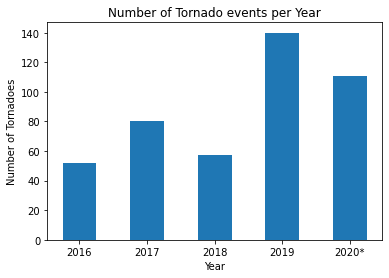

In [36]:
# visualize with a bar chart
labels = ['2016', '2017', '2018', '2019', '2020*']

x = np.arange(len(labels))  # the label locations
width = 0.5

fig, ax = plt.subplots()
rects = ax.bar(x, counts, width)

# add titles and custom x-axis tick labels
ax.set_xlabel('Year')
ax.set_ylabel('Number of Tornadoes')
ax.set_title('Number of Tornado events per Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)

This reveals that perhaps 2019 and 2020 had more tornadoes even when accounting for the amount of data provided. Note that this chart looks at the percentage of days for all reporting stations that a tornado occured. 2019 saw more than double the amount of tornados compared to 2018.

In [37]:
# group the tornado events by season, in this case by 3 month intervals
s1 = 0 
s2 = 0
s3 = 0
s4 = 0

for s in tornado_events['DATE']:
    if s.month < 4:
        s1 += 1
    elif s.month < 7:
        s2 += 1
    elif s.month < 10:
        s3 += 1
    else:
        s4 += 1
        
print(s1, s2, s3, s4)

129 203 17 73


In [38]:
# add SEASON column to tornado_data
tornado_data['DATE'] = tornado_data['DATE'].astype('datetime64[ns]')
season = []
for e in tornado_data['DATE']:
    if e.month < 4:
        season.append(1)
    elif e.month < 7:
        season.append(2)
    elif e.month < 10:
        season.append(3)
    else:
        season.append(4)
        
tornado_data['SEASON'] = season

In [39]:
tornado_data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,STP,TEMP,VISIB,WDSP,EVENT_ID,CZ_NAME_STR,BEGIN_DATE,BEGIN_TIME,TORNADO,TOR_F_SCALE,STATE_ABBR,CZ_TIMEZONE,EPISODE_ID,CZ_TYPE,CZ_FIPS,WFO,SOURCE,TOR_LENGTH,TOR_WIDTH,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,DAY_BEFORE,DISTANCE_MILES,SEASON
0,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-01,36.2,10000,20.0,52.0,41.0,12.0,0.08,1026.1,10.7,45.5,9.9,9.3,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-02,31.7,0,NaN,51.1,39.9,8.9,0.01,1027.7,12.1,43.5,10.0,6.5,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-03,35.2,10000,NaN,54.0,42.1,8.0,0.00,1022.8,7.4,46.2,10.0,3.9,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-04,32.7,0,17.1,55.0,37.0,12.0,0.00,1023.3,7.9,44.9,10.0,6.9,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-05,27.3,0,NaN,54.0,28.9,8.0,0.00,1027.7,12.2,39.2,10.0,4.5,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [40]:
tot_count = len(tornado_events[tornado_events['DATE'].dt.month.between(9,9)])
average_sept = int(tot_count / 4)
average_sept

0

There was only 1 tornado in September from 2016-2019, so on average this averages to 0 per year. Thus we don't have to worry about adding any estimated tornadoes to the Jul-Sep range.

In [41]:
# need to do a similar thing for Oct-Dec that we did for 2020, since there aren't as many datapoints
tot_count = len(tornado_events[tornado_events['DATE'].dt.month.between(10,12)])
average_oct_dec = int(tot_count / 4)
average_oct_dec

18

In [42]:
# add the estimated tornadoes for Oct-Dec 2020
s4 += average_oct_dec

In [43]:
print(s1, s2, s3, s4)

129 203 17 91


[Text(0, 0, 'Jan-Mar'),
 Text(1, 0, 'Apr-Jun'),
 Text(2, 0, 'Jul-Sep'),
 Text(3, 0, 'Oct-Dec*')]

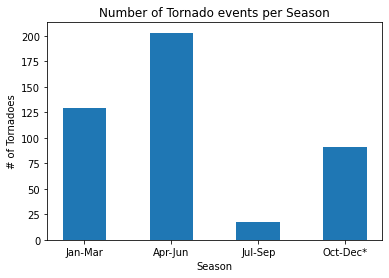

In [44]:
# plot a bar chart of the tornado events by season
bin_labels = ['Jan-Mar', 'Apr-Jun', 'Jul-Sep', 'Oct-Dec*']
bins = [s1, s2, s3, s4]

x = np.arange(len(bin_labels))  # the label locations
width = 0.5

fig, ax = plt.subplots()
rects = ax.bar(x, bins, width, label='# Tornadoes')

# add titles and custom x-axis tick labels
ax.set_ylabel('# of Tornadoes')
ax.set_xlabel('Season')
ax.set_title('Number of Tornado events per Season')
ax.set_xticks(x)
ax.set_xticklabels(bin_labels)

This chart shows a major discrepency in the number of tornadoes based on the seson. April to June saw over 200 tornadoes while July to September yielded only 17, a major difference. Note that this figure is skewed based on the grouping of months that I chose, and would look slighlty different if I chose different 3 month increments. Nonetheless, it shows that general idea that tornadoes are far more or less likely depending upon the month of the year.

<AxesSubplot:>

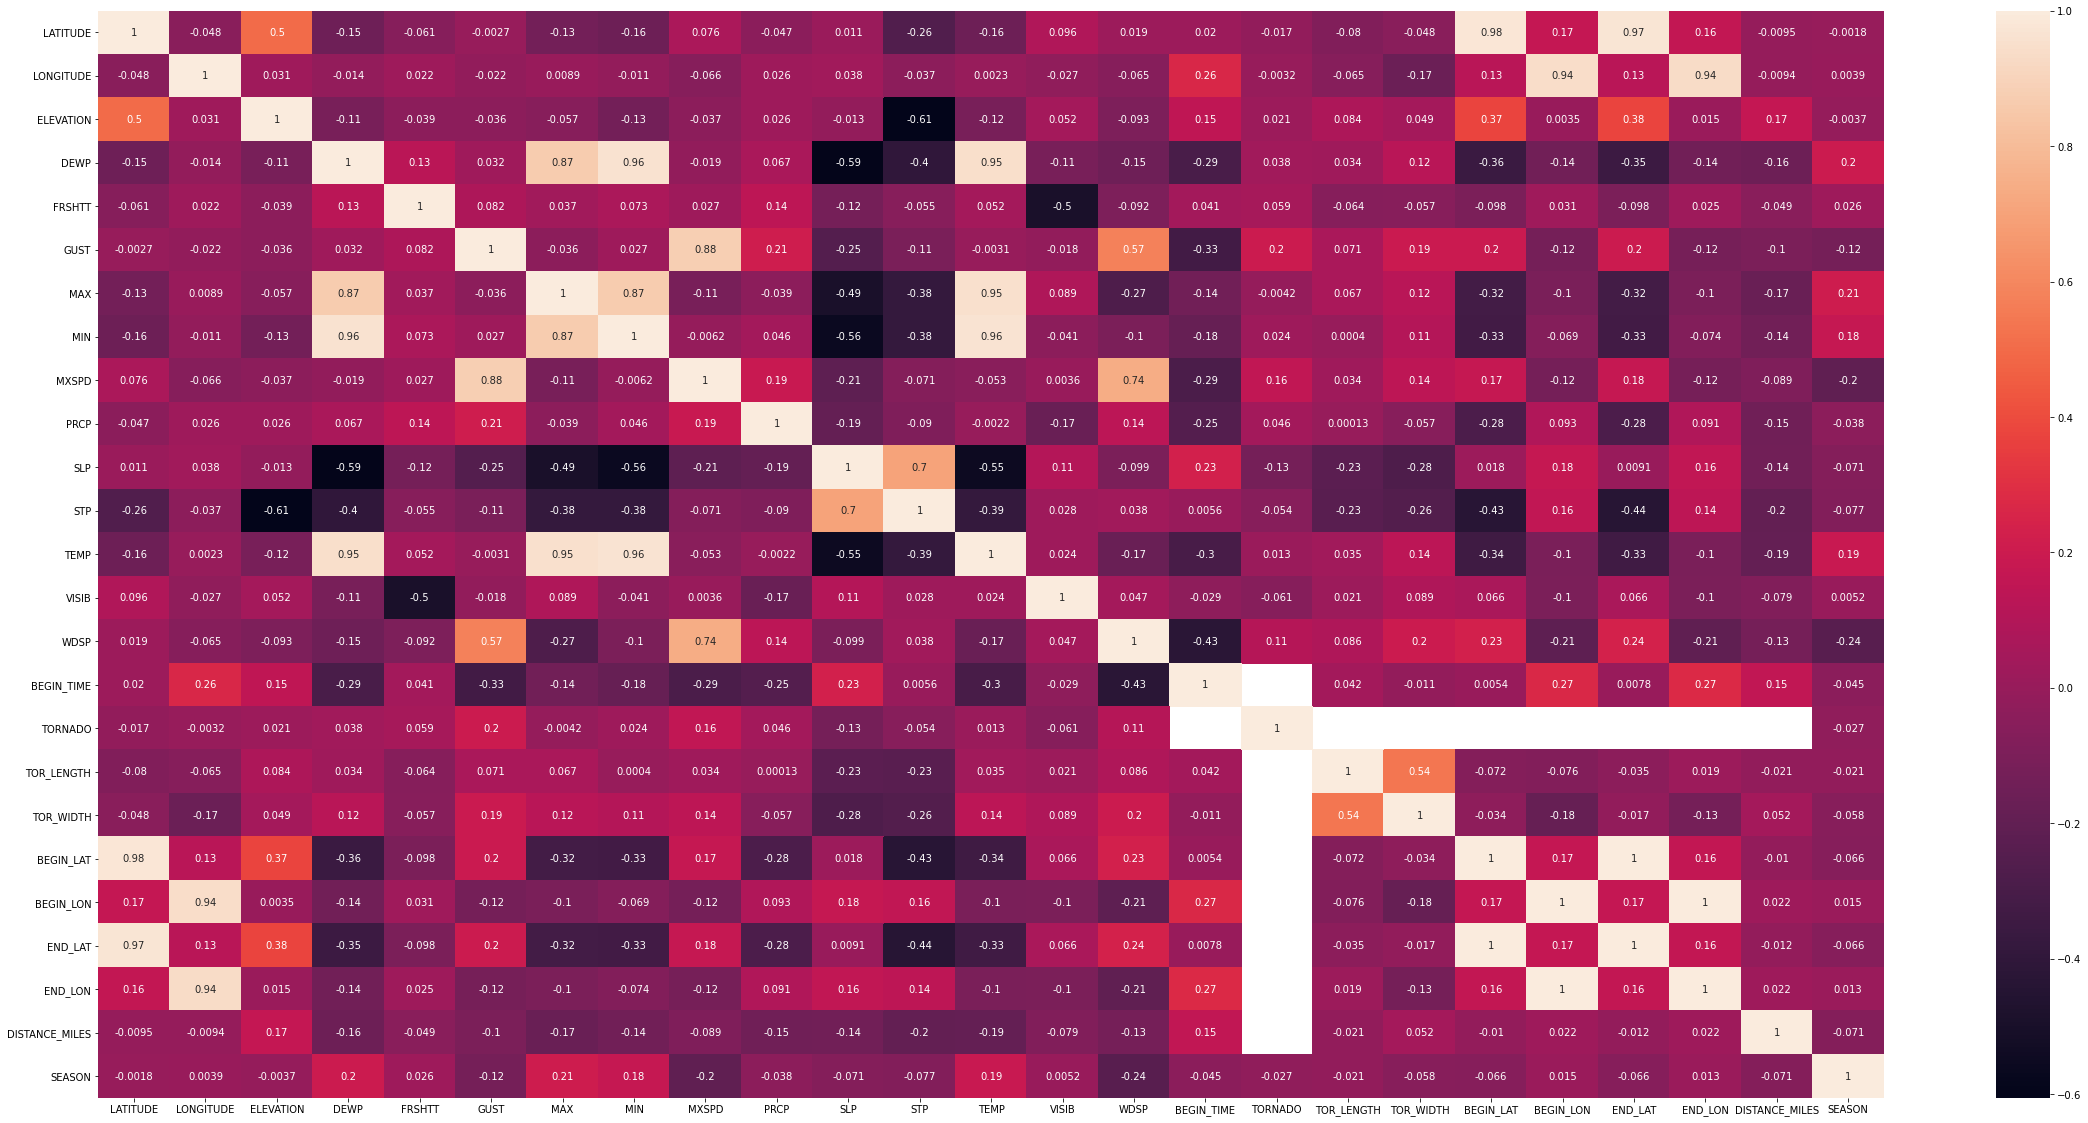

In [45]:
# plot heatmap of all attributes
plt.figure(figsize=(40,20))
sns.heatmap(tornado_data.corr(), annot=True)

In [46]:
# now choose only the weather attributes
arr = [6,8,9,10,11,12,13,14,15,16,17,22]
weather_data = tornado_data.iloc[:,arr]

<AxesSubplot:>

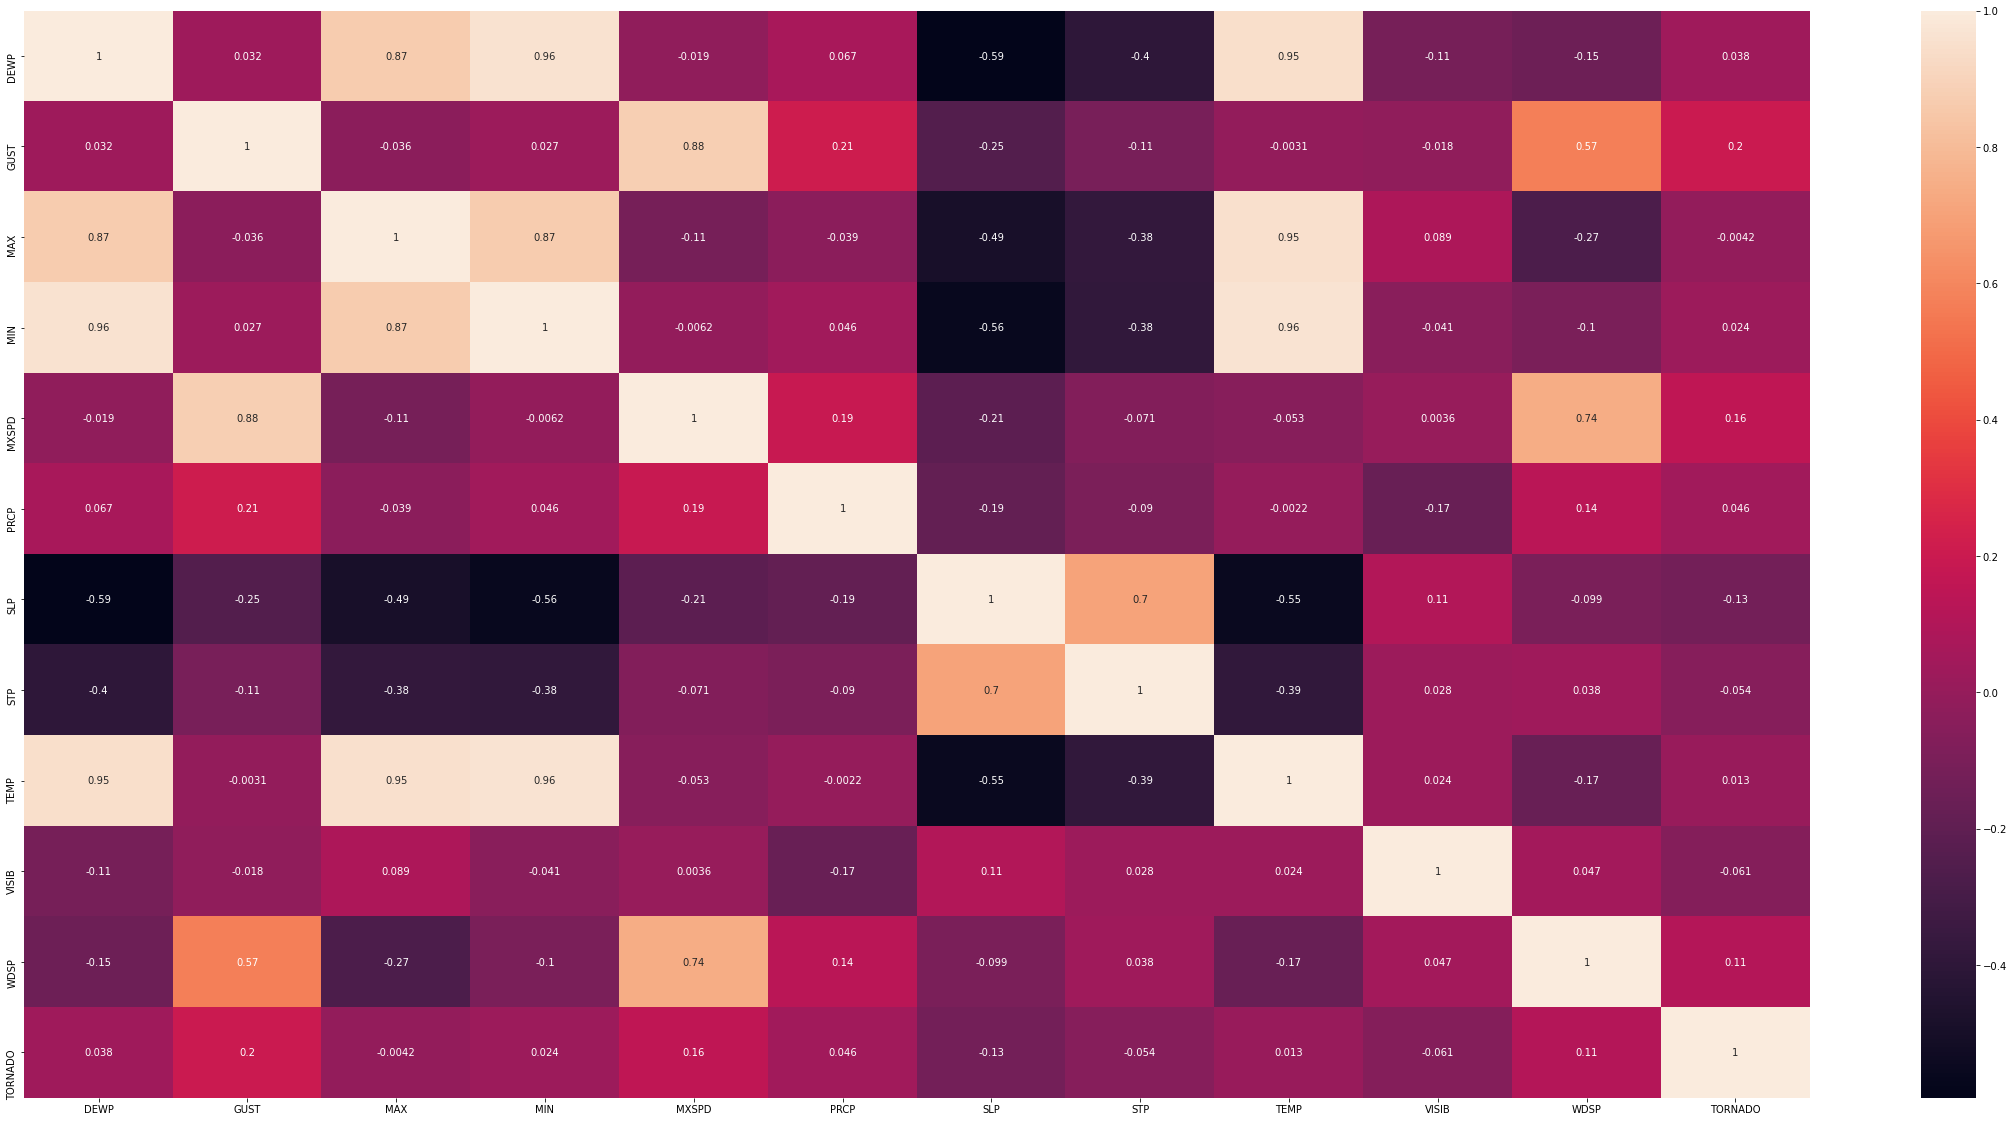

In [47]:
# plot heatmap for just the weather attributes to get a better look at potential correlations
plt.figure(figsize=(40,20))
sns.heatmap(weather_data.corr(), annot=True)

Some observations: temperature and dewpoint are very much all correlated, which makes sense since dewpoint uses temperature in its calculation. There's a moderately strong negative correlation between atmospheric pressure and elevation. Also, as seen earlier, the three wind and two pressure attributes are very strongly correlated. Looking at the target variable, there don't seem to be any strong correlations. 

In [48]:
# Biserial Correlations
columns = ['DEWP', 'GUST', 'MAX', 'MIN', 'MXSPD', 'PRCP', 'SLP', 'STP', 'TEMP', 'VISIB', 'WDSP']

for col in columns:
    tornado = np.array(tornado_data['TORNADO'].tolist())
    attribute = np.array(tornado_data[col].tolist())
    nas = np.logical_or(np.isnan(tornado), np.isnan(attribute))
    result = stats.pointbiserialr(tornado[~nas], attribute[~nas])
    print(result)

PointbiserialrResult(correlation=0.03761320417078569, pvalue=5.046606244257223e-16)
PointbiserialrResult(correlation=0.20083147210952818, pvalue=1.2677256550566325e-245)
PointbiserialrResult(correlation=-0.004198609679036654, pvalue=0.3480941542477117)
PointbiserialrResult(correlation=0.024202839208117548, pvalue=6.312784660623995e-08)
PointbiserialrResult(correlation=0.15712099938984522, pvalue=1.9015014940386066e-253)
PointbiserialrResult(correlation=0.04600940107738244, pvalue=6.179292642040356e-22)
PointbiserialrResult(correlation=-0.12694490940902084, pvalue=3.7818841287536134e-92)
PointbiserialrResult(correlation=-0.05429342757515831, pvalue=5.943571609594334e-27)
PointbiserialrResult(correlation=0.01345049025570014, pvalue=0.0026332669376215195)
PointbiserialrResult(correlation=-0.06079558017925264, pvalue=5.111965128651281e-38)
PointbiserialrResult(correlation=0.1146092754816702, pvalue=1.8304305070949202e-135)


In [49]:
# look at scatter plots of all combinations of the weather data
#sns.pairplot(weather_data)

This visualization is very helpful in getting a good sense of the weather patterns on days where tornadoes did occur. Just a quick glance reveals that the days before a tornado have a high Dewpoint, high Temperature, low Standard atmospheric pressure, and relatively high visibility.

Text(0.5, 1.0, 'Minimum Temperature vs. Dewpoint')

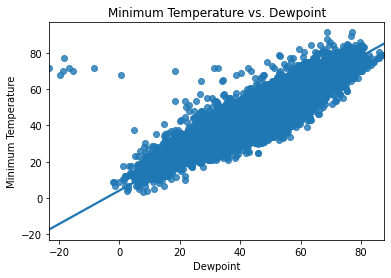

In [50]:
# plot dewpoint vs minimum temperature to get a closer look at the outliers
sns.regplot(x='DEWP', y='MIN', data=tornado_data)
plt.xlabel('Dewpoint')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature vs. Dewpoint')

Minimum temperature and dewpoint have a very strong correlation (0.96) and this can be seen in the above histogram. It's interesting to note the outlier values, where dewpoint is -20 and min temperature is about 70.

In [51]:
# see how many dewpoints values are negative
tornado_data.DEWP[tornado_data['DEWP'] < 0].count()

11

In [52]:
# look at the dewpoints with the lowest values and their associated minimum temperatures 
tornado_data.filter(['DEWP', 'MIN']).sort_values(by=['DEWP', 'MIN'], ascending=True).head(20)

,DEWP,MIN
42749,-23.2,71.6
42745,-19.8,68.0
42746,-18.8,69.8
42748,-18.4,77.0
42747,-16.7,71.6
42744,-15.4,69.8
42750,-8.3,71.6
9970,-2.1,8.6
37326,-1.8,8.6
30657,-1.6,6.8


It looks like rows 42745-42751 have very low dewpoints and very high low temperatures. This is not a usual pattern, so let's look at these rows closer.

In [53]:
tornado_data.iloc[42742:42753]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,STP,TEMP,VISIB,WDSP,EVENT_ID,CZ_NAME_STR,BEGIN_DATE,BEGIN_TIME,TORNADO,TOR_F_SCALE,STATE_ABBR,CZ_TIMEZONE,EPISODE_ID,CZ_TYPE,CZ_FIPS,WFO,SOURCE,TOR_LENGTH,TOR_WIDTH,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,DAY_BEFORE,DISTANCE_MILES,SEASON
42742,72076900275,"GEORGE M BRYAN AIRPORT, MS US",33.433,-88.849,101.2,2019-07-04,18.5,0,NaN,89.6,69.8,6.0,0.0,NaN,4.7,78.0,NaN,1.7,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
42743,72076900275,"GEORGE M BRYAN AIRPORT, MS US",33.433,-88.849,101.2,2019-07-05,0.5,0,15.9,91.4,68.0,8.9,0.0,NaN,6.6,77.3,NaN,0.5,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
42744,72076900275,"GEORGE M BRYAN AIRPORT, MS US",33.433,-88.849,101.2,2019-07-06,-15.4,0,20.0,87.8,69.8,9.9,0.0,NaN,6.5,75.5,NaN,0.8,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
42745,72076900275,"GEORGE M BRYAN AIRPORT, MS US",33.433,-88.849,101.2,2019-07-07,-19.8,0,31.1,82.4,68.0,14.0,0.0,NaN,4.1,73.9,NaN,0.9,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
42746,72076900275,"GEORGE M BRYAN AIRPORT, MS US",33.433,-88.849,101.2,2019-07-08,-18.8,0,19.0,89.6,69.8,12.0,0.0,NaN,2.1,76.1,NaN,1.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
42747,72076900275,"GEORGE M BRYAN AIRPORT, MS US",33.433,-88.849,101.2,2019-07-09,-16.7,0,NaN,86.0,71.6,5.1,0.0,NaN,2.2,76.0,NaN,0.3,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
42748,72076900275,"GEORGE M BRYAN AIRPORT, MS US",33.433,-88.849,101.2,2019-07-10,-18.4,0,NaN,82.4,77.0,6.0,0.0,NaN,2.8,78.5,NaN,0.4,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
42749,72076900275,"GEORGE M BRYAN AIRPORT, MS US",33.433,-88.849,101.2,2019-07-11,-23.2,0,18.1,80.6,71.6,8.9,0.0,NaN,1.9,74.0,NaN,2.6,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
42750,72076900275,"GEORGE M BRYAN AIRPORT, MS US",33.433,-88.849,101.2,2019-07-12,-8.3,0,17.1,91.4,71.6,8.9,0.0,NaN,0.0,79.9,NaN,3.3,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
42751,72076900275,"GEORGE M BRYAN AIRPORT, MS US",33.433,-88.849,101.2,2019-07-13,31.2,0,15.9,82.4,71.6,11.1,0.0,NaN,2.9,77.3,NaN,4.2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


After researching Dewpoint, which is calculated using air temperature and relative humidity, these negative values are possible (for example, a dewpoint of -23.2 and temperature of 71.6 would require a relative humidity of about 1.8). Although this is possible, it is most likely a result of an error in data recording, especially considering all of these values occur in succession in a week in July at the same station. Thus, I will remove these seven values being that the chance of these being accurate measurements is almost 0. 

In [54]:
# set these 7 values to np.nan
tornado_data.loc[42743:42750, 'DEWP'] = np.nan

Text(0.5, 1.0, 'Minimum Temperature vs. Dewpoint')

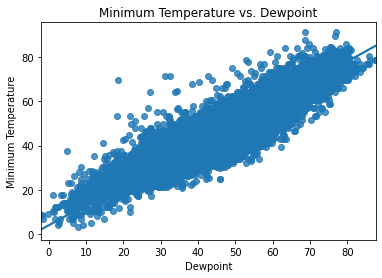

In [55]:
# plot the new Min vs DEWP plot without outliers
sns.regplot(x='DEWP', y='MIN', data=tornado_data)
plt.xlabel('Dewpoint')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature vs. Dewpoint')

This distribution looks much more evenly distributed.

Now let's look at boxplots of some of the above columns that showed discrepencies in whether or not a tornado occured on that day.

Text(0.5, 1.0, 'Temperature')

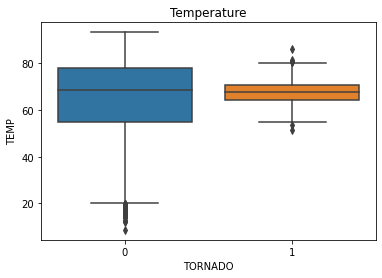

In [56]:
sns.boxplot(x='TORNADO', y='TEMP', data=tornado_data)
plt.title('Temperature')

In [57]:
# perform Mann-Whitney U test
stats.mannwhitneyu(tornado_data['TEMP'].loc[tornado_data['TORNADO'] == 0], tornado_data['TEMP'].loc[tornado_data['TORNADO'] == 1])

MannwhitneyuResult(statistic=10322093.5, pvalue=0.319819899563071)

Text(0.5, 1.0, 'Atmospheric Pressure')

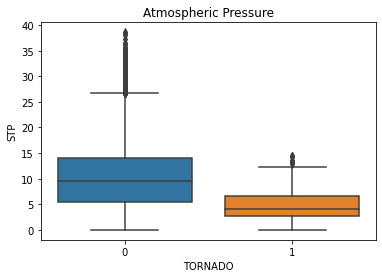

In [58]:
sns.boxplot(x='TORNADO', y='STP', data=tornado_data)
plt.title('Atmospheric Pressure')

In [59]:
# perform Mann-Whitney U test
stats.mannwhitneyu(tornado_data['STP'].loc[tornado_data['TORNADO'] == 0], tornado_data['STP'].loc[tornado_data['TORNADO'] == 1])

MannwhitneyuResult(statistic=9430417.5, pvalue=0.0002429520428623923)

Text(0.5, 1.0, 'Visibility')

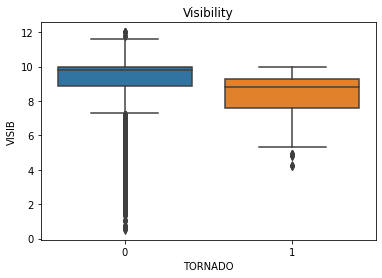

In [60]:
sns.boxplot(x='TORNADO', y='VISIB', data=tornado_data)
plt.title('Visibility')

In [61]:
# perform Mann-Whitney U test
stats.mannwhitneyu(tornado_data['VISIB'].loc[tornado_data['TORNADO'] == 0], tornado_data['VISIB'].loc[tornado_data['TORNADO'] == 1])

MannwhitneyuResult(statistic=6456690.0, pvalue=5.380239038431861e-44)

Text(0.5, 1.0, 'Dew Point')

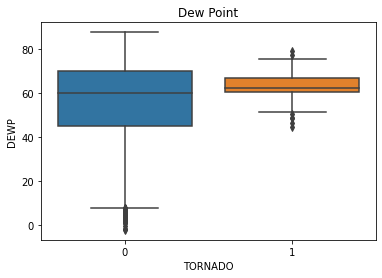

In [62]:
sns.boxplot(x='TORNADO', y='DEWP', data=tornado_data)
plt.title('Dew Point')

In [63]:
# perform Mann-Whitney U test
stats.mannwhitneyu(tornado_data['DEWP'].loc[tornado_data['TORNADO'] == 0], tornado_data['DEWP'].loc[tornado_data['TORNADO'] == 1])

MannwhitneyuResult(statistic=8687524.5, pvalue=9.587375175228704e-10)

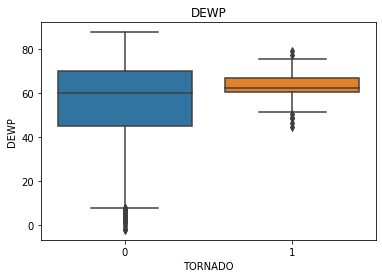

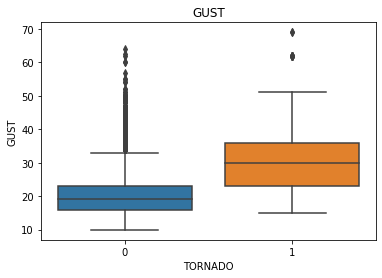

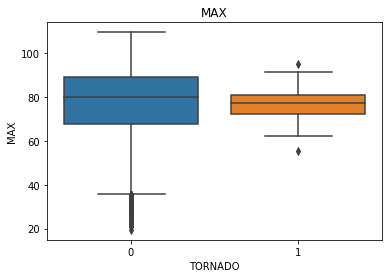

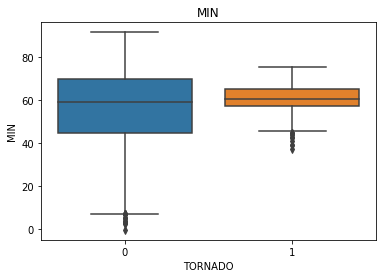

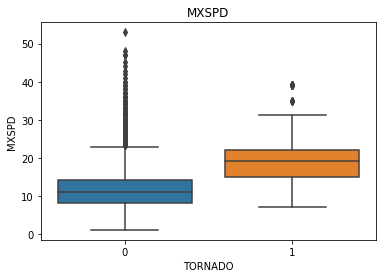

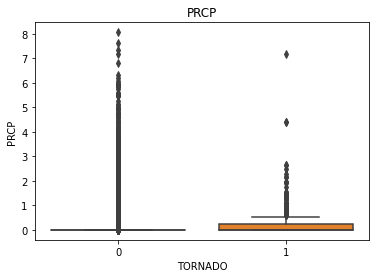

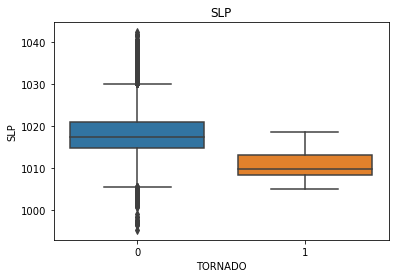

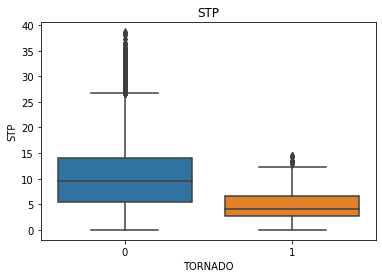

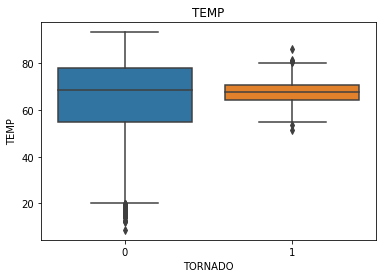

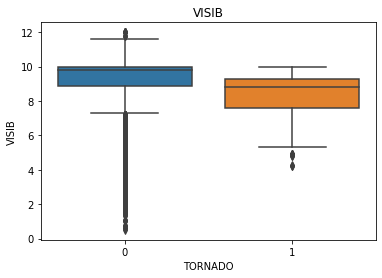

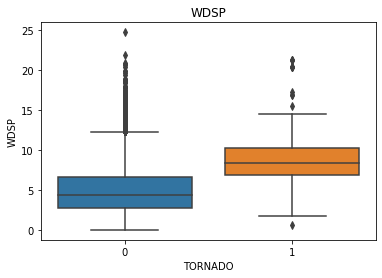

In [64]:
# plot all of the possible box plots
col = ['DEWP', 'GUST', 'MAX', 'MIN', 'MXSPD', 'PRCP', 'SLP', 'STP', 'TEMP', 'VISIB', 'WDSP']

for c in col:
    fig, ax = plt.subplots()
    sns.boxplot(x='TORNADO', y=c , data=tornado_data)
    plt.title(c)

In [65]:
for c in col:
    results = stats.mannwhitneyu(tornado_data[c].loc[tornado_data['TORNADO'] == 0], tornado_data[c].loc[tornado_data['TORNADO'] == 1])
    print(c, ':', results)

DEWP : MannwhitneyuResult(statistic=8687524.5, pvalue=9.587375175228704e-10)
GUST : MannwhitneyuResult(statistic=9870148.5, pvalue=0.02277460437619413)
MAX : MannwhitneyuResult(statistic=9113820.5, pvalue=2.5425079237003263e-06)
MIN : MannwhitneyuResult(statistic=9711640.0, pvalue=0.005603694261336254)
MXSPD : MannwhitneyuResult(statistic=3705895.5, pvalue=1.1109057975893449e-116)
PRCP : MannwhitneyuResult(statistic=7536914.5, pvalue=1.839163366604593e-32)
SLP : MannwhitneyuResult(statistic=6757503.5, pvalue=2.203621103066451e-36)
STP : MannwhitneyuResult(statistic=9430417.5, pvalue=0.0002429520428623923)
TEMP : MannwhitneyuResult(statistic=10322093.5, pvalue=0.319819899563071)
VISIB : MannwhitneyuResult(statistic=6456690.0, pvalue=5.380239038431861e-44)
WDSP : MannwhitneyuResult(statistic=4577886.5, pvalue=1.223724306457378e-88)


Running the Mann-Whitney U test reveals that the only feature that is not statistically significant is the temperature feature, since it has a p-value of 0.31.

# Other Observations

Text(0.5, 1.0, 'Distribution of Tornado Distance from Closest Station')

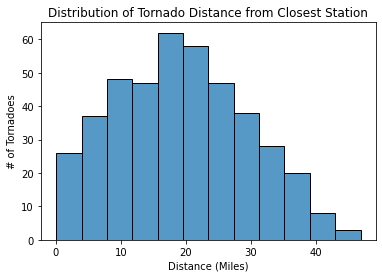

In [66]:
# plot the distribution of the distance of each tornado event from it's closest weather station
sns.histplot(data=tornado_data['DISTANCE_MILES'])
plt.xlabel('Distance (Miles)')
plt.ylabel('# of Tornadoes')
plt.title('Distribution of Tornado Distance from Closest Station')

In [67]:
# look at frequency of tornado strengths on F-scale
tornado_data['TOR_F_SCALE'].value_counts().sort_index()

EF0    121
EF1    226
EF2     59
EF3     10
EF4      6
Name: TOR_F_SCALE, dtype: int64

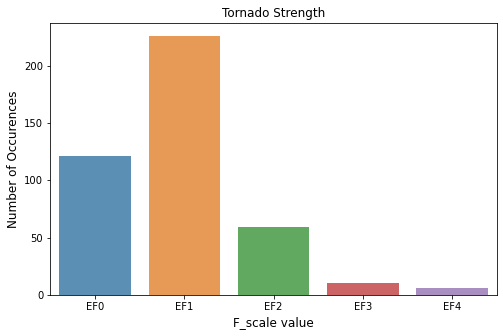

In [68]:
# create bar chart of the tornado f_scale value counts
f_scale = tornado_data['TOR_F_SCALE'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.barplot(x=f_scale.index, y=f_scale.values, alpha=0.8)
plt.title('Tornado Strength')
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('F_scale value', fontsize=12)
plt.show()

The most common strength of storms is EF1, which is a storm with winds of 86-110 mph. As storm strength increases, the frequency of their occurrence decreases. The f_scale goes up to EF5, but no such storms were reported in this time frame.

# Downsizing Data

Let's now look to create a new data set, in which we include all of the rows with tornadoes, but only some of the non-tornado rows. There are 422 rows containing a tornado event, but there are only 107 rows with no missing data. I want there to be a 4:1 ratio between non-tornado and tornado data, so we can randomly select 428 rows from the non-tornado rows to remain in this new set of data.

In [69]:
l = [2,3,4,6,8,9,10,11,12,13,14,15,16,17,22,39]
tornado_numeric = tornado_data.iloc[:, l]

In [70]:
# get a sample of 535 rows that didn't have tornado events
sample = tornado_numeric.loc[tornado_numeric['TORNADO'] != 1].dropna().sample(n=428, random_state=100)

In [71]:
sample.shape

(428, 16)

In [72]:
# filter all rows with tornadoes
sample_t = tornado_numeric.loc[tornado_numeric['TORNADO'] == 1].dropna()

In [73]:
sample_t.shape

(107, 16)

In [74]:
# combine above two dataframes into 1
downsized = pd.concat([sample, sample_t], axis=0, ignore_index=True)

In [75]:
downsized.shape

(535, 16)

In [76]:
downsized.head()

,LATITUDE,LONGITUDE,ELEVATION,DEWP,GUST,MAX,MIN,MXSPD,PRCP,SLP,STP,TEMP,VISIB,WDSP,TORNADO,SEASON
0,31.61667,-91.28333,82.9,70.2,15.9,90.0,66.9,11.1,0.19,1014.0,4.2,74.7,9.6,5.7,0,2
1,33.48250,-90.98528,39.0,70.7,18.1,84.0,73.0,13.0,0.01,1013.7,8.7,76.3,7.4,9.1,0,3
2,33.49630,-90.08660,40.5,74.4,15.0,93.0,75.0,8.9,0.00,1015.3,10.7,83.7,9.8,5.1,0,2
3,32.32050,-90.07770,100.6,58.0,14.0,91.9,57.0,11.1,0.00,1012.4,0.8,72.6,10.0,2.9,0,4
4,31.28194,-89.25306,46.0,57.5,19.0,79.0,59.0,12.0,0.00,1018.5,13.2,66.3,9.9,5.7,0,1


# Feature Importance

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [78]:
columns = downsized.columns
columns = columns.drop('TORNADO')

X = downsized[columns]
y = downsized['TORNADO']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

In [80]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [81]:
rf.feature_importances_

array([0.02019307, 0.0290664 , 0.02239739, 0.08070154, 0.13292937,
       0.0604339 , 0.05489837, 0.10797701, 0.02486437, 0.19323888,
       0.06692658, 0.05377391, 0.07619833, 0.0598466 , 0.01655428])

Text(0.5, 0, 'Percentage')

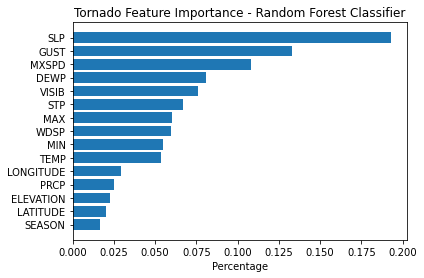

In [82]:
# sort the columns by importance
sorted_index = rf.feature_importances_.argsort()

# plot feature importance
plt.barh(columns[sorted_index], rf.feature_importances_[sorted_index])
plt.title('Tornado Feature Importance - Random Forest Classifier')
plt.xlabel('Percentage')

There's a lot to consider here. First, we are assuming that the 107 tornadoes without any missing data are a fairly evenly distributed sample of the 422 total. This must also be assumed with the non-tornado weather rows, but I chose a random sample of 428 from well over 1000 rows, so there is more randomness in this sample. As for the graph above, SLP (Sea Level Pressure) is the most important feature, and GUST is the second. This is interesting because these were the two columns that we considered dropping since they had so many missing values. Perhaps there is some reporting bias in these two features, but we will assume that the data was collected on a randomly sparse basis.

# Regression Analysis of Feature Importance

Now I'll use VIF scores and RobustScaler to perform another method of feature importance

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [84]:
from sklearn.preprocessing import RobustScaler

In [96]:
# drop colinear features for Logit model
X_reg = add_constant(downsized).drop(['STP', 'TEMP', 'MIN', 'MAX', 'MXSPD', 'TORNADO'], axis=1)
pd.Series([variance_inflation_factor(X_reg.values, i) for i in range(X_reg.shape[1])], index=X_reg.columns)

const        86875.378901
LATITUDE         1.265462
LONGITUDE        1.123992
ELEVATION        1.356295
DEWP             1.865851
GUST             1.859946
PRCP             1.222535
SLP              1.909389
VISIB            1.243857
WDSP             1.846554
SEASON           1.112845
dtype: float64

In [86]:
import statsmodels.api as sm 

# Logit model with non-normalized features
model = sm.Logit(y, X_reg, index_col=0)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.277073
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                TORNADO   No. Observations:                  535
Model:                          Logit   Df Residuals:                      524
Method:                           MLE   Df Model:                           10
Date:                Mon, 15 Mar 2021   Pseudo R-squ.:                  0.4463
Time:                        08:51:37   Log-Likelihood:                -148.23
converged:                       True   LL-Null:                       -267.72
Covariance Type:            nonrobust   LLR p-value:                 1.131e-45
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        332.0067     52.261      6.353      0.000     229.577     434.437
LATITUDE      -0.0883      0.151     -0.585      0.558      -0.384       0.207
LONGITUDE      0.7129      0.214      3.338      0.001       0.294       1.131
ELEVATION      0.0108      0.005      2.021      0.043       0.000       0.021
DEWP           0.0351      0.019      1.835      0.067      -0.002       0.073
GUST           0.1293      0.027      4.847      0.000       0.077       0.182
PRCP          -0.3628      0.210     -1.731      0.083      -0.774       0.048
SLP           -0.2658      0.045     -5.852      0.000      -0.355      -0.177
VISIB         -0.4232      0.135     -3.125      0.002      -0.689      -0.158
WDSP           0.1380      0.062      2.230      0.026       0.017       0.259
SEASON        -0.1470      0.158     -0.930      0.352      -0.457       0.163
==============================================================================
"""

This shows the Logit results for the non-normalized data. The only difference are in the coeficient, standard errod, and confidence interval, as well as all results for the constant.

In [87]:
# perfom RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
dataset = pd.DataFrame(X, columns=columns)
dataset.describe()

,LATITUDE,LONGITUDE,ELEVATION,DEWP,GUST,MAX,MIN,MXSPD,PRCP,SLP,STP,TEMP,VISIB,WDSP,SEASON
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,-0.065281,-0.205383,-0.067367,-0.178256,0.169505,-0.051353,-0.112624,0.288525,1.273141,0.065047,0.085599,-0.076543,-0.473917,0.098538,0.110280
std,0.548572,0.641583,0.712313,0.701564,0.952510,0.715640,0.626666,0.925443,3.164335,0.817804,0.648207,0.705309,1.067634,0.804291,0.540484
min,-0.867325,-1.512418,-1.211462,-2.298734,-0.898876,-2.169591,-1.923445,-1.147541,-0.043478,-2.138462,-0.909091,-2.255072,-5.818182,-1.282051,-0.500000
25%,-0.471953,-0.620933,-0.549407,-0.630380,-0.438202,-0.473684,-0.569378,-0.327869,-0.043478,-0.430769,-0.443182,-0.504348,-0.727273,-0.461538,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.528047,0.379067,0.450593,0.369620,0.561798,0.526316,0.430622,0.672131,0.956522,0.569231,0.556818,0.495652,0.272727,0.538462,0.500000
max,0.882366,0.598227,1.167984,0.875949,4.494382,1.280702,0.904306,4.098361,31.217391,2.553846,2.318182,1.118841,0.272727,3.743590,1.000000


In [88]:
# drop colinear features for Logit model
X = add_constant(dataset).drop(['STP', 'TEMP', 'MIN', 'MAX', 'MXSPD'], axis=1)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

const        1.677588
LATITUDE     1.265462
LONGITUDE    1.123992
ELEVATION    1.356295
DEWP         1.865851
GUST         1.859946
PRCP         1.222535
SLP          1.909389
VISIB        1.243857
WDSP         1.846554
SEASON       1.112845
dtype: float64

From Alexander on StackOverflow https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python

In [89]:
import statsmodels.api as sm 

# Logit model with normalized features
model = sm.Logit(y, X, index_col=0)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.277073
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                TORNADO   No. Observations:                  535
Model:                          Logit   Df Residuals:                      524
Method:                           MLE   Df Model:                           10
Date:                Mon, 15 Mar 2021   Pseudo R-squ.:                  0.4463
Time:                        08:51:57   Log-Likelihood:                -148.23
converged:                       True   LL-Null:                       -267.72
Covariance Type:            nonrobust   LLR p-value:                 1.131e-45
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3265      0.226    -10.294      0.000      -2.769      -1.884
LATITUDE      -0.1943      0.332     -0.585      0.558      -0.845       0.456
LONGITUDE      0.9570      0.287      3.338      0.001       0.395       1.519
ELEVATION      0.5456      0.270      2.021      0.043       0.016       1.075
DEWP           0.6931      0.378      1.835      0.067      -0.047       1.434
GUST           1.1507      0.237      4.847      0.000       0.685       1.616
PRCP          -0.0834      0.048     -1.731      0.083      -0.178       0.011
SLP           -1.7279      0.295     -5.852      0.000      -2.307      -1.149
VISIB         -0.4655      0.149     -3.125      0.002      -0.757      -0.174
WDSP           0.5382      0.241      2.230      0.026       0.065       1.011
SEASON        -0.2940      0.316     -0.930      0.352      -0.914       0.326
==============================================================================
"""

# Analyzing Downsized Data

Let's look at some scatter plots of the features, color-coded based on whether or not a tornado occurred.

Text(0.5, 1.0, 'Max Wind Speed vs. Temperature')

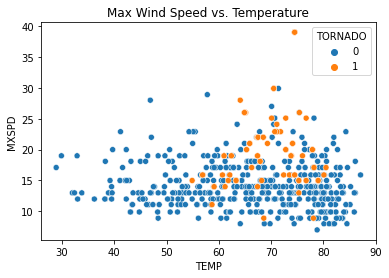

In [90]:
# scatter plot of MXSPD and TEMP sorted by Tornado occurrence
sns.scatterplot(x=downsized['TEMP'], y=downsized['MXSPD'], hue=downsized['TORNADO'])
plt.title('Max Wind Speed vs. Temperature')

Text(0.5, 1.0, 'Maximum Temperature vs. Atmospheric Pressure')

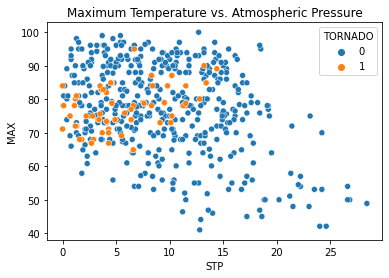

In [91]:
# scatter plot of STP and MAX sorted by Tornado occurrence
sns.scatterplot(x=downsized['STP'], y=downsized['MAX'], hue=downsized['TORNADO'])
plt.title('Maximum Temperature vs. Atmospheric Pressure')

Text(0.5, 1.0, 'Average Wind Speed vs. Visibility')

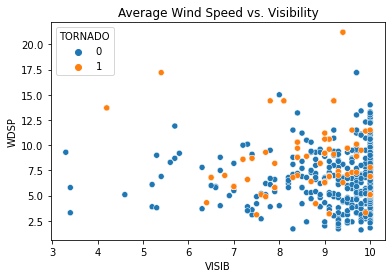

In [92]:
# scatter plot of VISIB and WDSP sorted by Tornado occurrence
sns.scatterplot(x=downsized['VISIB'], y=downsized['WDSP'], hue=downsized['TORNADO'])
plt.title('Average Wind Speed vs. Visibility')

Text(0.5, 1.0, 'Temperature vs. Dew Point')

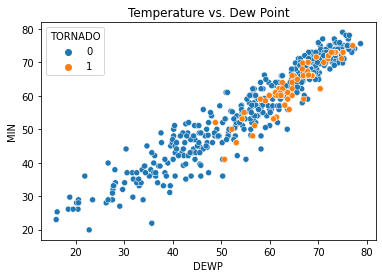

In [93]:
# scatter plot of DEWP and MIN sorted by Tornado occurrence
sns.scatterplot(x=downsized['DEWP'], y=downsized['MIN'], hue=downsized['TORNADO'])
plt.title('Temperature vs. Dew Point')

Just picking out a few feature pairs, it is apparent that there is some significance in whether or not a tornado occurred. The Tempereature vs. Dew Point example directly above shows this well. There were no tornadoes with a DEWP below 40 or MIN temperature below 30. I could look at each combination and analyze the discrepancies but this wouldn't be super valuable or productive. It is simply good to know that on the days where a tornado is occurring, the meteorological data is reflecting this change.

In [94]:
downsized.to_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornado_downsized.csv', index=False)